# DSCI GROUP PROJECT: (title)

## Question
**Broad Question**: “What player characteristics and behaviours are most predictive of 
subscribing to a game-related newsletter, and how do these features differ between various player types?”\
**Specific Question**: Can age and played_hours  predict if a player is subscribed in 
the players data set?\
\
→ Maybe rephrased it to...\
Can variables, age and played_hours in players.csv data set, predict if a player subscribes the news letter?"

`subscribe`: It has TRUE/FALSE statements. TRUE for those who subscribe the news settler:FALSE for those who do NOT subscribe the news letter.

CODE:

In [17]:
library(tidyverse)
library(repr)
library(tidymodels)
library(cowplot)

In [18]:
players <- read_csv("https://raw.githubusercontent.com/svipond2/projectplanningindividual/refs/heads/main/players%20(2).csv")
head(players)

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


In [19]:
players_select <- players|>
    select(subscribe, played_hours, Age)
head(players_select)

subscribe,played_hours,Age
<lgl>,<dbl>,<dbl>
TRUE,30.3,9
TRUE,3.8,17
FALSE,0.0,17
TRUE,0.7,21
TRUE,0.1,21
TRUE,0.0,17


## Mean Value Calculation

In [20]:
players_mean <- players |>
                select(played_hours, Age) |>
                map_df(mean, na.rm=TRUE)
players_mean

played_hours,Age
<dbl>,<dbl>
5.845918,20.52062


In [21]:
sessions_mean <- sessions |>
                select(original_start_time, original_end_time) |>
                map_df(mean, na.rm=TRUE)
sessions_mean

ERROR: Error in eval(expr, envir, enclos): object 'sessions' not found


**Justification that using players.csv is suitable to answer the specific question.**

## Exploratory Data Analysis and Visualization

Age
<dbl>
9
17
17
21
21
17


Warning message:
“Removed 2 rows containing non-finite outside the scale range (`stat_bin()`).”


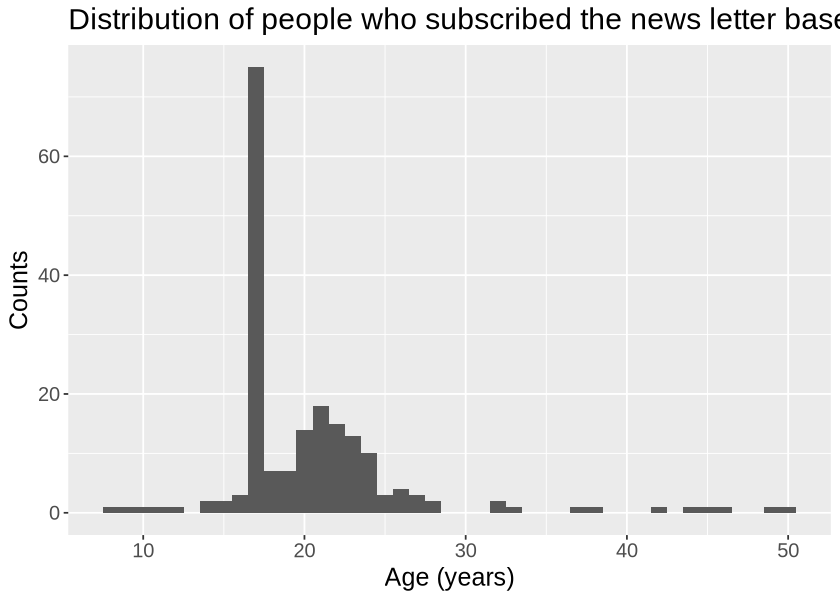

In [22]:
#Before making cool graphs, we want to start from very basic graph to see if there is any trend.

#First, I want to see if the relationship between age and subscribe.
options(repr.plot.width= 7, repr.plot.height= 5)

subscribed_age <- players |>
                    filter(subscribe= TRUE) |>
                    select(Age)

subscirbe_age_plot <- ggplot(subscribed_age, aes(x=Age)) +
                        geom_histogram(binwidth=1) +
                        labs(x="Age (years)", y= "Counts", 
                             title= "Distribution of people who subscribed the news letter based on Age") +
                        theme(text=element_text(size=15))

head(subscribed_age)
subscirbe_age_plot

played_hours
<dbl>
30.3
3.8
0.0
0.7
0.1
0.0


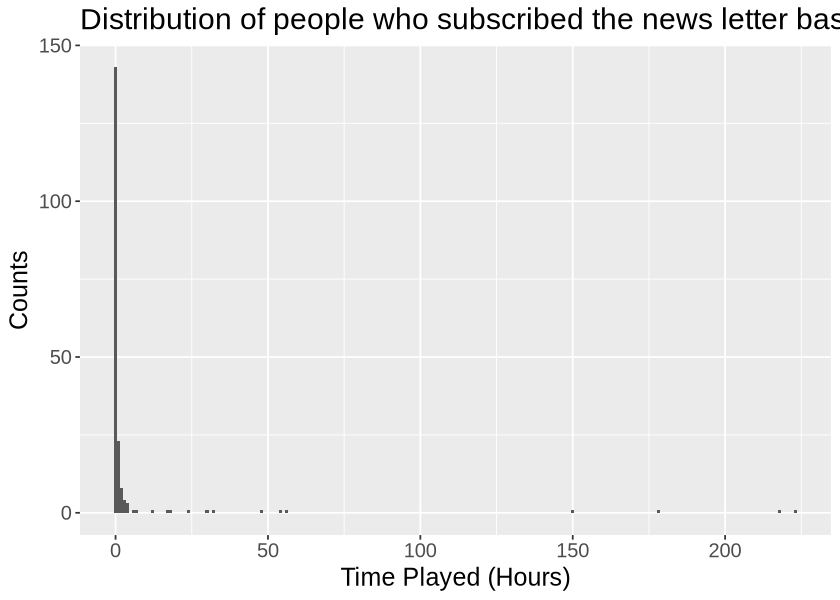

In [23]:
# Second, I want to see if the relationship between played_hours and subscribe.

subscribed_hours <- players |>
                    filter(subscribe= TRUE) |>
                    select(played_hours)

subscirbe_hours_plot <- ggplot(subscribed_hours, aes(x=played_hours)) +
                        geom_histogram(binwidth=1) +
                        labs(x="Time Played (Hours)", y= "Counts", 
                             title= "Distribution of people who subscribed the news letter based on Played Hours") +
                        theme(text=element_text(size=15))

head(subscribed_hours)
subscirbe_hours_plot

subscribe,played_hours,Age
<lgl>,<dbl>,<dbl>
FALSE,0.0,17
TRUE,0.7,21
TRUE,0.1,21
TRUE,0.0,17
TRUE,0.0,19
FALSE,0.0,21


subscribe,played_hours,Age
<lgl>,<dbl>,<dbl>
TRUE,30.3,9
TRUE,3.8,17
TRUE,48.4,17
TRUE,5.6,17
TRUE,12.5,27
TRUE,218.1,20


Warning message in geom_histogram(stat = "count", position = "dodge", bins = 30, :
“Ignoring unknown parameters: `binwidth`, `bins`, and `pad`”
Warning message in geom_histogram(stat = "count", position = "dodge", bins = 30, :
“Ignoring unknown parameters: `binwidth`, `bins`, and `pad`”


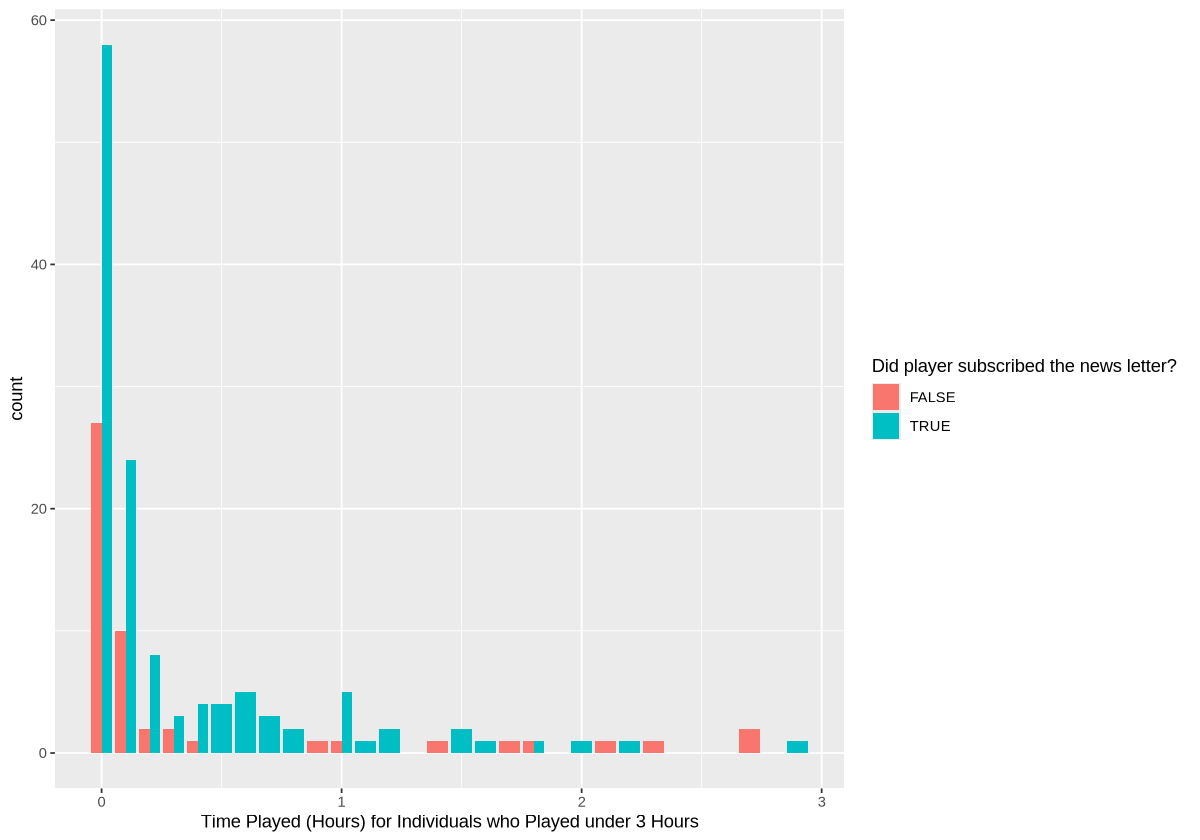

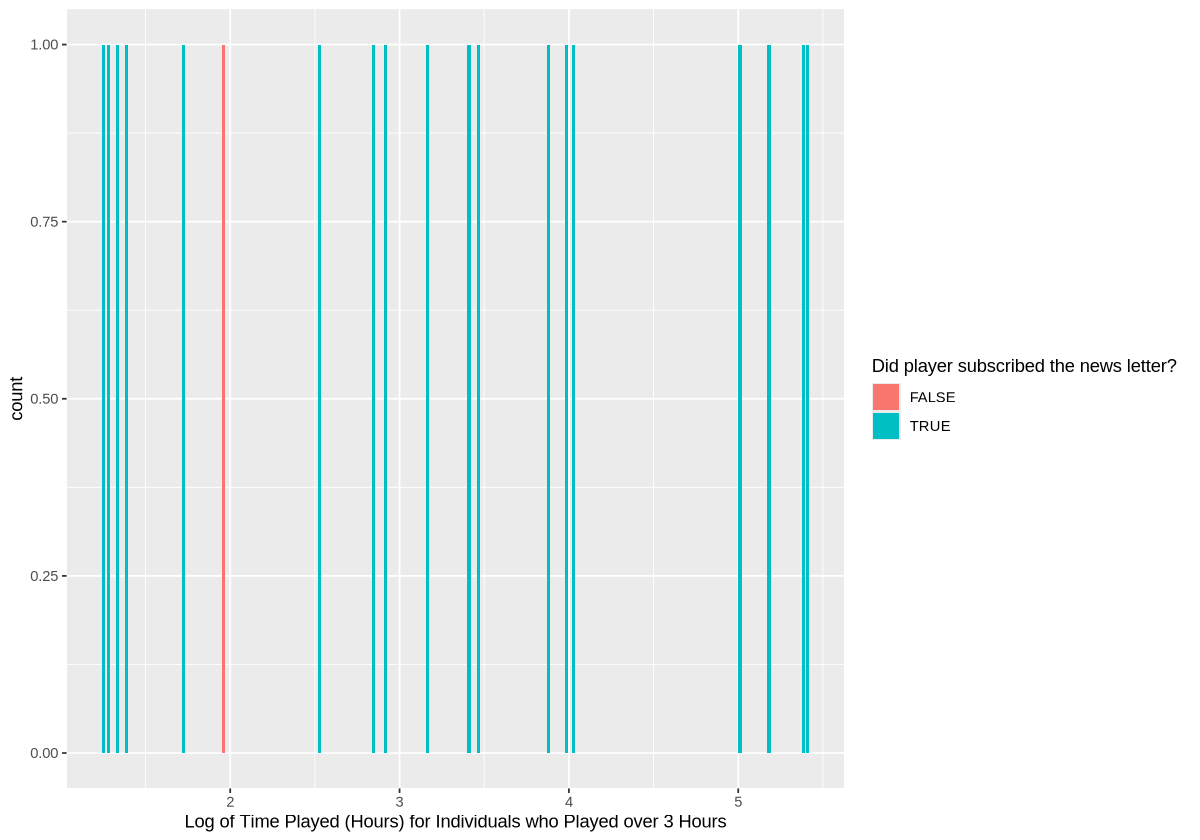

In [24]:
# Copied the code from Zoe's for comparison
# Modified so that the subscribed and unsubscribed piles up separatory.
options(repr.plot.width=10, repr.plot.height=7)

players_separate_1 <- players_select |>
                        filter(played_hours <= 3)
players_separate_2 <- players_select |>
                        filter(played_hours >=3)

head(players_separate_1)
head(players_separate_2)

played_hours_small_plot <- players_separate_1|>
                        ggplot(aes(x=played_hours, fill=subscribe))+
                        geom_histogram( stat="count", position= "dodge", bins=30, binwidth=10)+
                        labs(x="Time Played (Hours) for Individuals who Played under 3 Hours", fill="Did player subscribed the news letter?")
played_hours_small_plot

played_hours_large_plot <- players_separate_2|>
                        mutate(played_hours_log = log(played_hours))|>
                        ggplot(aes(x=played_hours_log, fill=subscribe))+
                        geom_histogram( stat="count", position= "dodge", bins=30, binwidth=10)+
                        labs(x="Log of Time Played (Hours) for Individuals who Played over 3 Hours", fill="Did player subscribed the news letter?")
played_hours_large_plot

We can see that if someone has played over 3 hours, they are very likely to have subscribed to the newsletter. However, if they have played under 3 hours, the time played is not enough to predict whether someone has subscribed to the newsletter or not. For this, we will have to use age to predict. 

Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


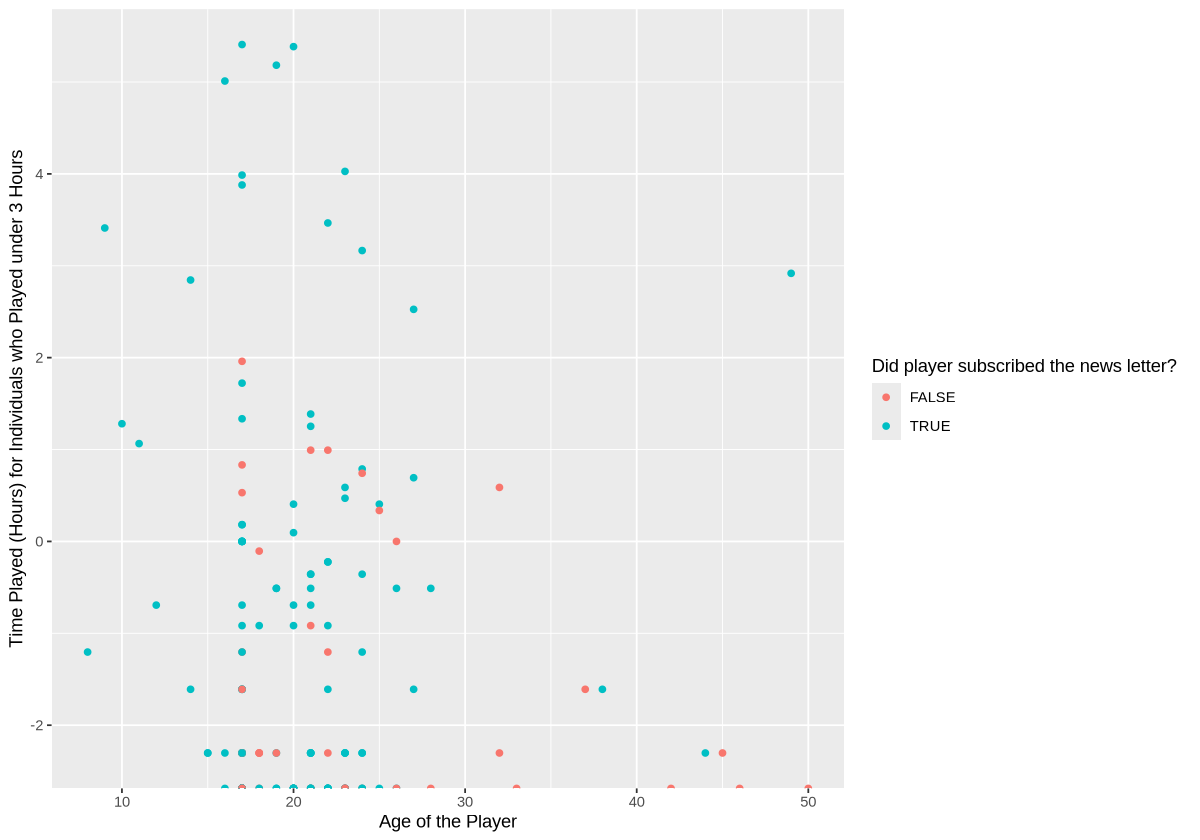

In [25]:
hours_age_small_plot <- players_select|>
                        mutate(played_hours_log = log(played_hours))|>
                        ggplot(aes(x=Age, y=played_hours_log, colour=subscribe))+
                        geom_point()+
                        labs(x="Age of the Player", y="Time Played (Hours) for Individuals who Played under 3 Hours", colour="Did player subscribed the news letter?")

hours_age_small_plot

From this analysis, we can see that if someone is under the age of 30 and played under 3 hours they are more likely to subscribe. 

*Are we doing classification analysis still?*

In [58]:
players_fct <- players_select |>
    mutate(subscribe = as_factor(subscribe))

In [51]:
set.seed(1234)
players_split <- initial_split(players_fct, prop=0.75, strata=subscribe)
training_set <- training(players_split)
testing_set <- testing(players_split)

→ A | error:   Assigned data `orig_rows` must be compatible with existing data.
               ✖ Existing data has 29 rows.
               ✖ Assigned data has 30 rows.
               ℹ Only vectors of size 1 are recycled.
               Caused by error in `vectbl_recycle_rhs_rows()`:
               ! Can't recycle input of size 30 to size 29.

There were issues with some computations   A: x1

There were issues with some computations   A: x2

There were issues with some computations   A: x2





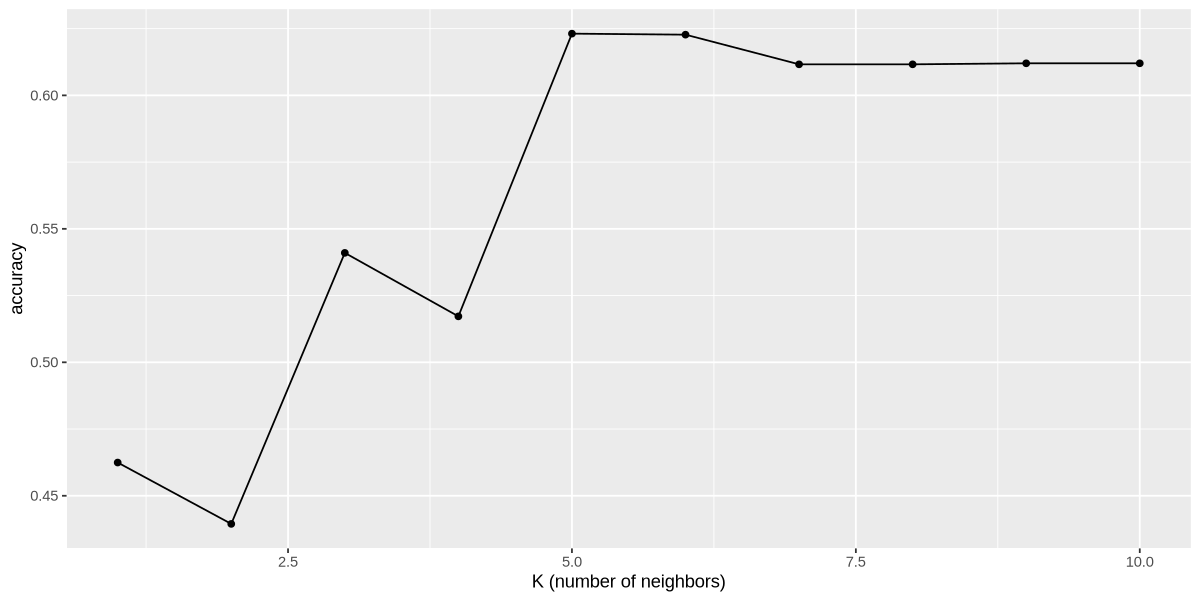

In [57]:
#knn classification using age and played_hours


options(repr.plot.height = 5, repr.plot.width = 10)
knn_recipe<-recipe(subscribe~ Age + played_hours, data=training_set)|>
    step_scale(all_predictors())|>
    step_center(all_predictors())

knn_spec<-nearest_neighbor(weight_func="rectangular", neighbors=tune())|>
    set_mode("classification")|>
    set_engine("kknn")

knn_workflow<-workflow()|>
    add_recipe(knn_recipe)|>
    add_model(knn_spec)

knn_fold<-vfold_cv(training_set, v=5, strata=subscribe)

k_values<-c(1:10)

tune_res<-knn_workflow|>
tune_grid(resamples=knn_fold, grid=tibble(neighbors=k_values))

metrics<-collect_metrics(tune_res)

cross_val_plot<-metrics|>
filter(.metric=="accuracy")|>
ggplot(aes(x=neighbors, y=mean))+
geom_point()+
geom_line()+
labs(x= "K (number of neighbors)", y="accuracy")

cross_val_plot

From this analyis, we can determine that we should use k=5 to determine whether someone is subscribed or not. 

In [109]:
players_spec <- nearest_neighbor(weight_func="rectangular", neighbors=5)|>
    set_engine("kknn")|>
    set_mode("classification") 

players_fit <- workflow()|>
    add_recipe(knn_recipe)|>
    add_model(players_spec)|>
    fit(data=players_fct)

players_predictions <- predict(players_fit, testing_set)|>
    bind_cols(testing_set)

In [113]:
are_grid <- seq(min(players_fct$played_hours, na.rm=TRUE),
                max(players_fct$played_hours, na.rm=TRUE),
                length.out = 5)
smo_grid <- seq(min(players_fct$Age, na.rm=TRUE),
                max(players_fct$Age, na.rm=TRUE),
                length.out = 5)
asgrid <- as_tibble(expand.grid(played_hours = are_grid,
                                Age = smo_grid))

knnPredGrid <- predict(players_fit, asgrid)

prediction_table <- bind_cols(knnPredGrid, asgrid) |>
  rename(subscribe = .pred_class)

Warning message in scale_y_log10(oob = scales::squish_infinite):
“log-10 transformation introduced infinite values.”
Warning message in scale_y_log10(oob = scales::squish_infinite):
“log-10 transformation introduced infinite values.”
Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


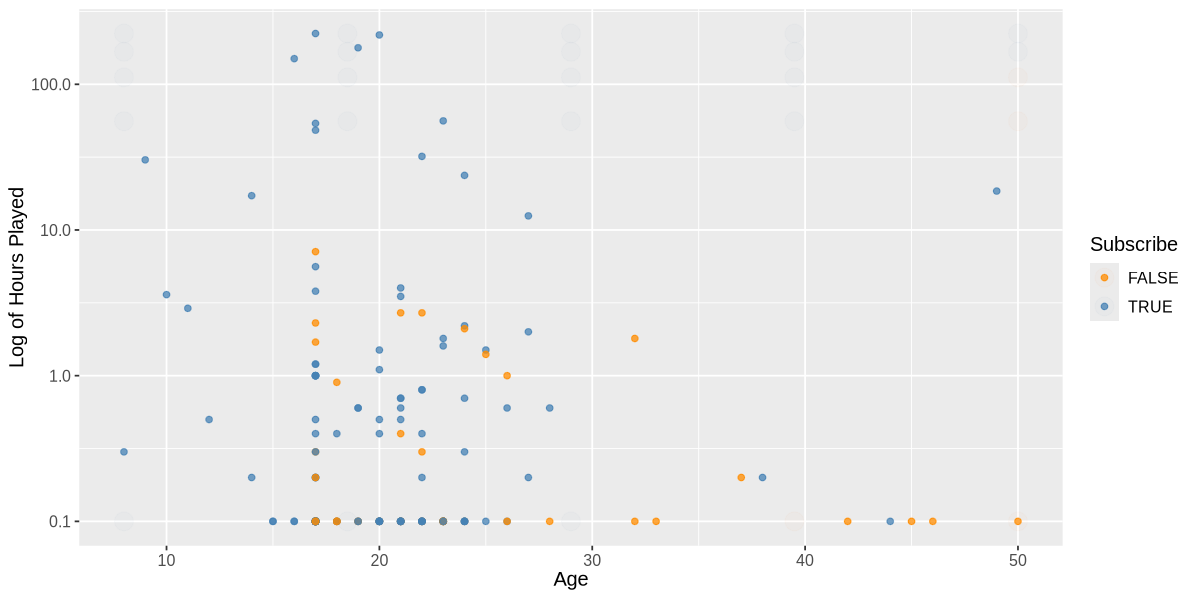

In [122]:
prediction_plot <- 
  ggplot() +
  geom_point(data = players_fct,
             mapping = aes(x = Age,
                           y =played_hours,
                           color = subscribe),
             alpha = 0.75) +
  geom_point(data = prediction_table,
             mapping = aes(x = Age,
                           y = played_hours,
                           color = subscribe),
             alpha = 0.02,
             size = 5) +
    scale_y_log10(oob = scales::squish_infinite)+
  labs(color = "Subscribe",
       x = "Age",
       y = "Log of Hours Played") +
  scale_color_manual(values = c("darkorange", "steelblue")) +
  theme(text = element_text(size = 12))

prediction_plot